In [18]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import pandas as pd

import json
import glob
import os

In [2]:
paths = glob.glob(os.environ['TDCCH_EXP_OUTPUT_DIR'] + "customization_scaling/*.json")
data = [json.load(open(path)) for path in paths]

In [7]:
customization_running_times = pd.DataFrame.from_records([{ 
    'num_threads': run['num_threads'], 
    'customization_running_time_s': algo['main']['running_time_ms'] / 1000 } 
    for run in data if not 'TDCCH_DISABLE_PAR' in run['feature_flags'] for algo in run["algo_runs"] if algo['algo'] == "Floating TDCCH Customization"])
customization_running_times['work'] = customization_running_times['num_threads'] * customization_running_times['customization_running_time_s']

In [ ]:
baseline = pd.DataFrame.from_records([{
    'customization_running_time_s': algo['main']['running_time_ms'] / 1000 } 
    for run in data if 'TDCCH_DISABLE_PAR' in run['feature_flags'] for algo in run["algo_runs"] if algo['algo'] == "Floating TDCCH Customization"]) \
    ['customization_running_time_s'].avg()

In [12]:
baseline = 8000

In [15]:
customization_running_times['efficiency'] = baseline / customization_running_times['work']

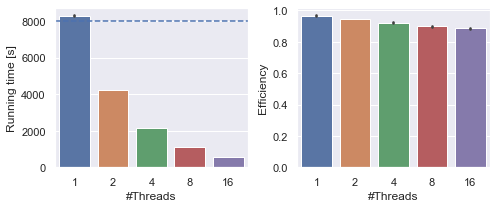

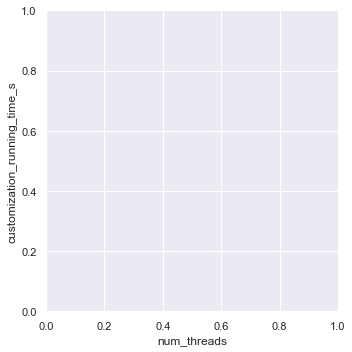

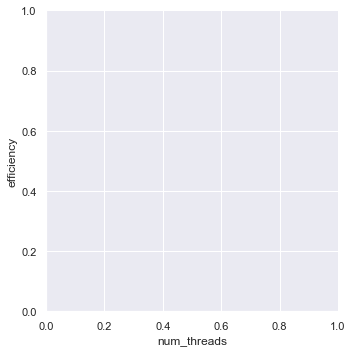

In [33]:
fig = plt.figure(figsize=(7,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.catplot(x="num_threads", y="customization_running_time_s", kind="bar", data=customization_running_times, ax=ax1)
ax1.set(xlabel='#Threads', ylabel='Running time [s]')
ax1.axhline(y=baseline, linestyle='dashed')

sns.catplot(x="num_threads", y="efficiency", kind="bar", data=customization_running_times, ax=ax2)
ax2.set(xlabel='#Threads', ylabel='Efficiency')

fig.tight_layout()

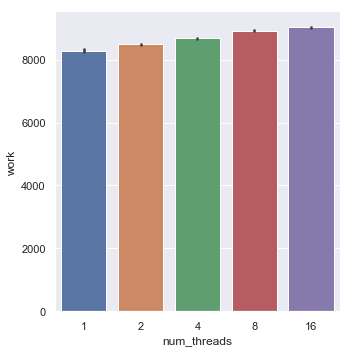

In [17]:
sns.catplot(x="num_threads", y="work", kind="bar", data=customization_running_times);

In [14]:
customization_running_times.groupby('num_threads')['customization_running_time_s'].mean()

num_threads
1     8288.2070
2     4242.3342
4     2171.4710
8     1114.3678
16     564.1110
Name: customization_running_time_s, dtype: float64

In [15]:
customization_running_times.groupby('num_threads')['customization_running_time_s'].std()

num_threads
1     50.261101
2      5.519159
4      4.941765
8      2.352714
16     1.853040
Name: customization_running_time_s, dtype: float64